### Ex. 2.8 
Compare the classification performance of linear regression and k–
nearest neighbor classification on the zipcode data. In particular, consider
only the 2’s and 3’s, and k = 1, 3, 5, 7 and 15. Show both the training and
test error for each choice. The zipcode data are available from the book
website www-stat.stanford.edu/ElemStatLearn.

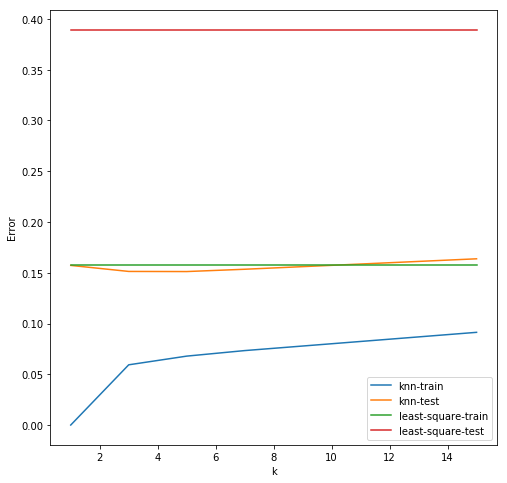

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def filtered_data(path):
    data_all = np.loadtxt(path)
    mask = np.in1d(data_all[:, 0], (2, 3))
    data_x = data_all[mask, 1: ]
    data_y = data_all[mask, 0]
    return data_x, data_y

train_x, train_y = filtered_data('../data/zipcode/zip.train')
test_x, test_y = filtered_data('../data/zipcode/zip.test')
k_list = [1, 3, 5, 7, 15]

def knn_error(k, x, y, data_x, data_y):
    distances = ((data_x - x)**2).sum(axis=1)
    return (np.mean(data_y[distances.argpartition(k)[:k]]) - y) ** 2

def std(squared_errors):
    """standard deviation of the given squared errors."""
    return np.sqrt(np.mean(squared_errors))

def knn_stds():
    train_stds = []
    test_stds = []
    for k in k_list:
        train_errors = [knn_error(k, x, y, train_x, train_y)
                        for (x, y) in zip(train_x, train_y)]
        train_stds.append(std(train_errors))
        test_errors = [knn_error(k, x, y, train_x, train_y)
                        for (x, y) in zip(test_x, test_y)]
        test_stds.append(std(test_errors))
    return train_stds, test_stds

def least_square_stds():
    X = np.c_[np.ones((len(train_x), 1)), train_x]
    beta = np.linalg.lstsq(X, train_y, rcond = None)[0]
    error = lambda x, y: (np.dot(np.array([1, *x]), beta) - y) ** 2

    train_stds = []
    test_stds = []

    for k in k_list:
        train_errors = [error(x, y) for (x, y) in zip(train_x, train_y)]
        train_stds.append(std(train_errors))
        test_errors = [error(x, y) for (x, y) in zip(test_x, test_y)]
        test_stds.append(std(test_errors))

    return train_stds, test_stds

fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1, 1, 1)

# kNN plotting
train_stds, test_stds = knn_stds()
axes.plot(k_list, train_stds, '-', 
          color = 'C0', label = 'knn-train')
axes.plot(k_list, test_stds, '-', 
          color = 'C1', label = 'knn-test')

# least square plotting
train_stds, test_stds = least_square_stds()
axes.plot(k_list, train_stds, '-', 
          color = 'C2', label = 'least-square-train')
axes.plot(k_list, test_stds, '-', 
          color = 'C3', label = 'least-square-test')

axes.legend()
axes.set_xlabel("k")
axes.set_ylabel("Error")
plt.show()